In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('Examdata1.txt', header=None)
df

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [4]:
df = df.rename(columns={0:'Exam 1 Score',1:'Exam 2 Score',2:'Admission'})
df.head()

,Exam 1 Score,Exam 2 Score,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
df.describe()

,Exam 1 Score,Exam 2 Score,Admission
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [13]:
X= df.iloc[:, :-1].values
Y= df.iloc[:, -1].values

print('our data:', pd.DataFrame(x))

print('\nour label:', pd.DataFrame(y))


our data:             0          1
0   34.623660  78.024693
1   30.286711  43.894998
2   35.847409  72.902198
3   60.182599  86.308552
4   79.032736  75.344376
..        ...        ...
95  83.489163  48.380286
96  42.261701  87.103851
97  99.315009  68.775409
98  55.340018  64.931938
99  74.775893  89.529813

[100 rows x 2 columns]

our label:     0
0   0
1   0
2   0
3   1
4   1
.. ..
95  1
96  1
97  1
98  1
99  1

[100 rows x 1 columns]


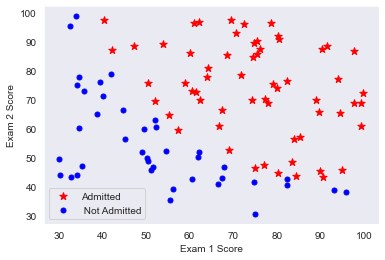

In [20]:
sns.set_style("dark")
pos , neg = (Y==1).reshape(100,1) , (Y==0).reshape(100,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="*",s=60)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c='b',marker="o",s=25)
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend(["Admitted"," Not Admitted"],loc=3)

In [15]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    return 1/ (1 + np.exp(-z))

In [16]:
print(sigmoid(-np.inf))
print(sigmoid(0))
print(sigmoid(np.inf))

0.0
0.5
1.0


In [21]:
def feature_scaling(X):
    
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [22]:
m , n = X.shape[0], X.shape[1]
X_appended= np.append(np.ones((m,1)),X,axis=1)
print('Number of Instances: ',m)
print('Number of Features: ',n)

Number of Instances:  100
Number of Features:  2


In [23]:
X_scaled, X_mean, X_std = feature_scaling(X)

In [24]:
X_scaled= np.append(np.ones((m,1)),X_scaled,axis=1)
Y = Y.reshape(-1,1)

In [25]:
initial_theta = np.random.rand(n+1,1)
initial_theta.shape

(3, 1)

In [26]:
predictions = sigmoid(np.dot(X_scaled,initial_theta))
cost = 1/m * sum((-Y * np.log(predictions)) - ((1-Y)*np.log(1-predictions)))
print("Cost of initial theta is",cost)

Cost of initial theta is [0.46565101]


In [28]:
def compute_cost(x, theta, y):
    
    m=len(y)
    
    predictions = sigmoid(np.dot(x,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(x.transpose(),(predictions - y))
    
    return cost[0] , grad

In [29]:
def batch_gradient_descent(x, y, learning_rate, iterations):
   
    m=len(y)
    n=x.shape[1]
    cost_history =[]
    theta = np.random.rand(n,1)
    for i in range(iterations):
        cost, grad = compute_cost(x, theta,y)
        theta = theta - (learning_rate * grad)
        cost_history.append(cost)
    
    return theta , cost_history

In [30]:
theta_gradient_descent , cost_history_gradient_descent = batch_gradient_descent(X_scaled,Y,0.1,1000)

In [32]:
print("Theta optimized by Batch Gradient Descent:",pd.DataFrame(theta_gradient_descent))
print("The cost of the optimized theta:",cost_history_gradient_descent[-1])

Theta optimized by Batch Gradient Descent:           0
0  1.283905
1  3.074932
2  2.838231
The cost of the optimized theta: 0.21009587184153136


Text(0.5, 1.0, 'Cost function using Batch Gradient Descent')

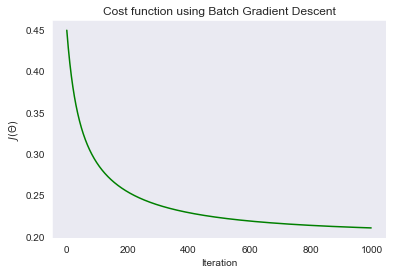

In [35]:
plt.plot(cost_history_gradient_descent, c="g")
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Batch Gradient Descent")

Text(0.5, 1.0, 'Decision Boundary using Batch Gradient Descent')

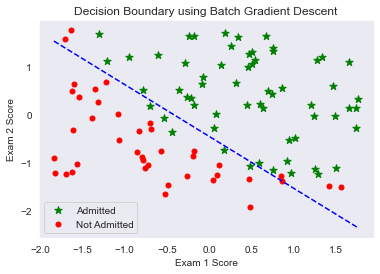

In [36]:
plt.scatter(X_scaled[pos[:,0],1],X_scaled[pos[:,0],2],c="g",marker="*",label="Admitted",s=60)
plt.scatter(X_scaled[neg[:,0],1],X_scaled[neg[:,0],2],c="r",marker="o",label="Not Admitted", s=25)
x_value= np.array([np.min(X_scaled[:,1]),np.max(X_scaled[:,1])])
y_value=-(theta_gradient_descent[0] +theta_gradient_descent[1]*x_value)/theta_gradient_descent[2]
plt.plot(x_value,y_value, "b--")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend(loc=3)
plt.title("Decision Boundary using Batch Gradient Descent")

In [38]:
def Classifier_Predict(theta,X):
    predictions = X.dot(theta)
    
    return predictions>0

In [39]:
Predictions = Classifier_Predict(theta_gradient_descent,X_scaled)
print("Training Accuracy:", sum(Predictions==Y)[0],"%")

Training Accuracy: 89 %


In [40]:
#Prediction on test set
x_test = np.array([45,90])
x_test_norm = (x_test - X_mean)/X_std
x_test_norm = np.append(np.ones(1),x_test_norm)
prob = sigmoid(x_test_norm.dot(theta_gradient_descent))
print("For a student with scores", x_test[0], "and", x_test[1], "We predict an admission probability of",prob[0])

For a student with scores 45 and 90 We predict an admission probability of 0.8395825803641488


In [41]:
def stochastic_gradient_descent(x, y, t0, t1,learning_rate, iterations):

    def learning_schedule(t):
        return t0 / (t + t1)
    
    m=len(y)
    n=x.shape[1]
    cost_history =[]
    theta = np.random.rand(n,1)
    
    for epoch in range(iterations):
        for i in range(m):
            
            random_index = np.random.randint(m)  #pick a random index for random instance choosing
        
            xi = x[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            cost, grad = compute_cost(xi, theta, yi)
            #learning_rate = learning_schedule(epoch * m + i)
            theta = theta - (learning_rate * grad)
        cost_history.append(cost)
    
    return theta , cost_history

In [42]:
theta_sgd, cost_history_sgd = stochastic_gradient_descent(X_scaled, Y, 5, 50, 0.1, 1000)

In [43]:
print("Theta optimized by Stochastic Gradient Descent:",pd.DataFrame(theta_sgd))
print("The cost of the optimized theta:",cost_history_sgd[-1])

Theta optimized by Stochastic Gradient Descent:           0
0  1.518614
1  4.073157
2  3.762357
The cost of the optimized theta: 5.1874595314674155e-05


Plotting of Cost Function:

Text(0.5, 1.0, 'Cost function using Stochastic Gradient Descent (SGD)')

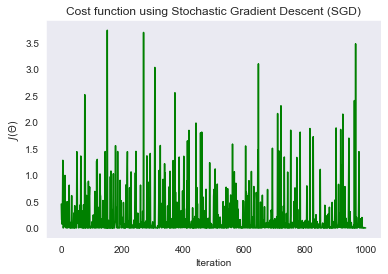

In [44]:
plt.plot(cost_history_sgd, c="g")
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Stochastic Gradient Descent (SGD)")

Plotting the Decision Boundary

Text(0.5, 1.0, 'Decision Boundary using Stochastic Gradient Descent')

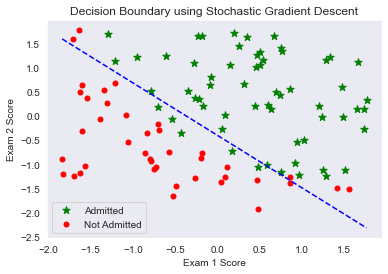

In [45]:
plt.scatter(X_scaled[pos[:,0],1],X_scaled[pos[:,0],2],c="g",marker="*",label="Admitted",s=60)
plt.scatter(X_scaled[neg[:,0],1],X_scaled[neg[:,0],2],c="r",marker="o",label="Not Admitted", s=25)
x_value= np.array([np.min(X_scaled[:,1]),np.max(X_scaled[:,1])])
y_value=-(theta_sgd[0] +theta_sgd[1]*x_value)/theta_sgd[2]
plt.plot(x_value,y_value, "b--")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend(loc=3)
plt.title("Decision Boundary using Stochastic Gradient Descent")

In [51]:
#Accuracy on Training Set
Predictions = Classifier_Predict(theta_sgd,X_scaled)
print("Training Accuracy:", sum(Predictions==Y)[0],"%")

#Pridiction on test set
x_test = np.array([45,90])
x_test_norm = (x_test - X_mean)/X_std
x_test_norm = np.append(np.ones(1),x_test_norm)
prob = sigmoid(x_test_norm.dot(theta_sgd))
print("For a student with scores", x_test[0], "and", x_test[1], "We predict an admission probability of",prob[0])


Training Accuracy: 90 %
For a student with scores 45 and 90 We predict an admission probability of 0.8822456315637596


In [49]:
#Its better than SGD

In [52]:
def minibatch_gradient_descent(x, y, learning_rate, minibatch_size, iterations):

    m=len(y)
    n=x.shape[1]
    cost_history =[]
    theta = np.random.rand(n,1)
    num_bathces = m // minibatch_size #number of mini batches
    
    for i in range(iterations):
        for j in range(num_bathces):
            
            if m % minibatch_size != 0 & j == num_bathces-1:
                xm = x[j*minibatch_size:]
                ym = y[j*minibatch_size:]
            
            #seperating the features and labels miibatches in xm and ym
            xm = x[j*minibatch_size:(j+1)*minibatch_size]
            ym = y[j*minibatch_size:(j+1)*minibatch_size]
        
            #update the parameter theta
            
            cost, grad = compute_cost(xm, theta, ym)
            theta = theta - (learning_rate * grad)
        cost_history.append(cost)
    
    return theta , cost_history

In [53]:
theta_mb_gd, cost_history_mb_gd = minibatch_gradient_descent(X_scaled, Y, 0.1, 10, 1000)

In [54]:
print("Theta optimized by Mini-Batch Gradient Descent:",pd.DataFrame(theta_mb_gd))
print("The cost of the optimized theta:",cost_history_mb_gd[-1])

Theta optimized by Mini-Batch Gradient Descent:           0
0  1.722528
1  3.991439
2  3.728987
The cost of the optimized theta: 0.1610161002884235


Text(0.5, 1.0, 'Cost function using Mini-Batch Gradient Descent')

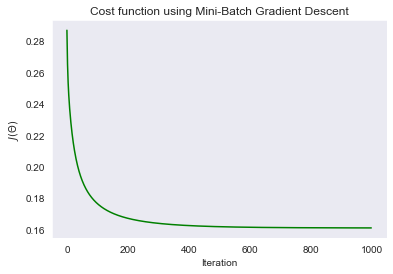

In [56]:
#Plotting of Cost Function
plt.plot(cost_history_mb_gd, c="g")
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Mini-Batch Gradient Descent")

Text(0.5, 1.0, 'Decision Boundary using Mini-Batch Gradient Descent')

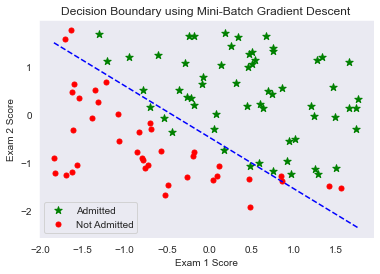

In [57]:
#Plotting the Decision Boundary
plt.scatter(X_scaled[pos[:,0],1],X_scaled[pos[:,0],2],c="g",marker="*",label="Admitted",s=60)
plt.scatter(X_scaled[neg[:,0],1],X_scaled[neg[:,0],2],c="r",marker="o",label="Not Admitted", s=25)
x_value= np.array([np.min(X_scaled[:,1]),np.max(X_scaled[:,1])])
y_value=-(theta_mb_gd[0] +theta_mb_gd[1]*x_value)/theta_mb_gd[2]
plt.plot(x_value,y_value, "b--")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend(loc=3)
plt.title("Decision Boundary using Mini-Batch Gradient Descent")

In [58]:
#Accuracy on Training Set

Predictions = Classifier_Predict(theta_mb_gd,X_scaled)
print("Training Accuracy:", sum(Predictions==Y)[0],"%")

#Prediction on Test Set

x_test = np.array([45,90])
x_test_norm = (x_test - X_mean)/X_std
x_test_norm = np.append(np.ones(1),x_test_norm)
prob = sigmoid(x_test_norm.dot(theta_mb_gd))
print("For a student with scores", x_test[0], "and", x_test[1], "We predict an admission probability of",prob[0])

Training Accuracy: 89 %
For a student with scores 45 and 90 We predict an admission probability of 0.9056810289645449


Conclusion

Text(0.5, 1.0, 'Decision Boundaries')

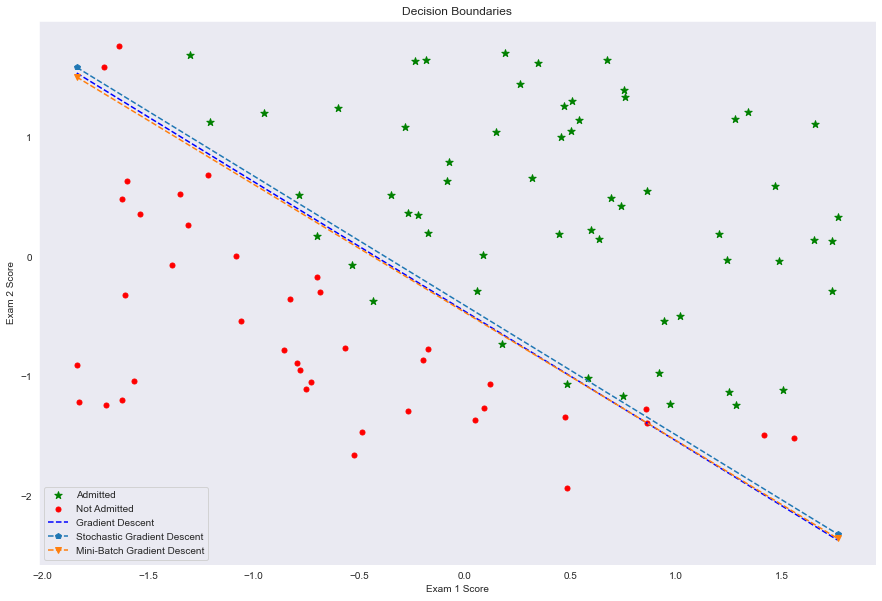

In [59]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.scatter(X_scaled[pos[:,0],1],X_scaled[pos[:,0],2],c="g",marker="*",label="Admitted",s=60)
plt.scatter(X_scaled[neg[:,0],1],X_scaled[neg[:,0],2],c="r",marker="o",label="Not Admitted", s=25)

x_value_gd= np.array([np.min(X_scaled[:,1]),np.max(X_scaled[:,1])])
y_value_gd=-(theta_gradient_descent[0] +theta_gradient_descent[1]*x_value_gd)/theta_gradient_descent[2]
plt.plot(x_value_gd,y_value_gd, "b--", label='Gradient Descent')

x_value_sgd= np.array([np.min(X_scaled[:,1]),np.max(X_scaled[:,1])])
y_value_sgd=-(theta_sgd[0] +theta_sgd[1]*x_value_sgd)/theta_sgd[2]
plt.plot(x_value_sgd,y_value_sgd, "p--", label='Stochastic Gradient Descent')

x_value_mbgd= np.array([np.min(X_scaled[:,1]),np.max(X_scaled[:,1])])
y_value_mbgd=-(theta_mb_gd[0] +theta_mb_gd[1]*x_value_mbgd)/theta_mb_gd[2]
plt.plot(x_value_mbgd,y_value_mbgd, "v--", label='Mini-Batch Gradient Descent')

plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend(loc=3)
plt.title("Decision Boundaries")

Text(0.5, 1.0, 'Cost function')

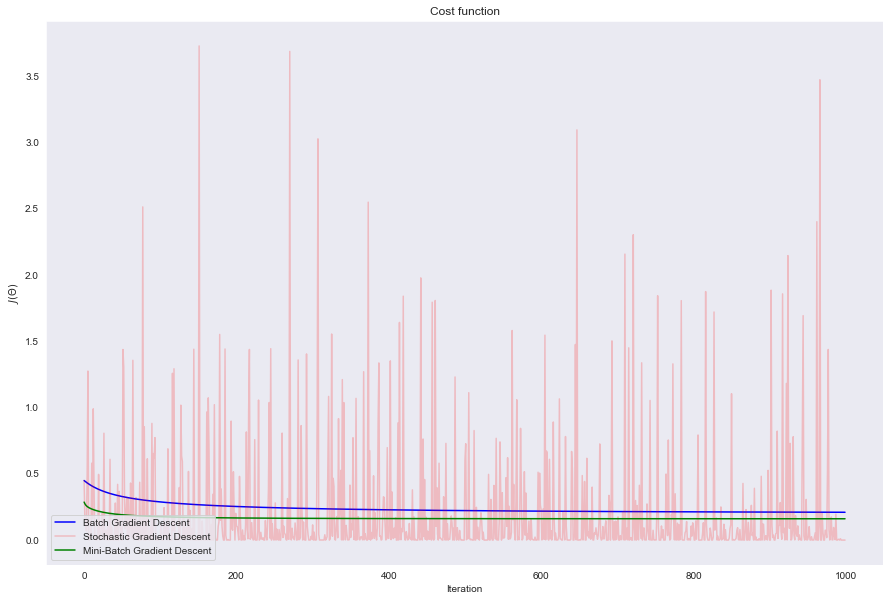

In [60]:
h = plt.figure()
h.set_figwidth(15)
h.set_figheight(10)

plt.plot(cost_history_gradient_descent, c="b", label='Batch Gradient Descent')
plt.plot(cost_history_sgd, c="r", alpha=0.2, label='Stochastic Gradient Descent')
plt.plot(cost_history_mb_gd, c="g", label='Mini-Batch Gradient Descent')
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.legend(loc=3)
plt.title("Cost function")

Finish